In [7]:
#import required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats

In [1]:
import os
os.getcwd()

'C:\\Users\\91797\\Garima Practice file\\Project Folder'

In [8]:
service311 = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv', low_memory=False)
service311

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,Bridge_Highway_Name,Bridge_Highway_Direction,Road_Ramp,Bridge_Highway_Segment,Garage_Lot_Name,Ferry_Direction,Ferry_Terminal_Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-2016 00:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-2016 01:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-2016 04:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-2016 07:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-2016 03:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,03/29/2015 12:33:41 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"


In [9]:
service311.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique_Key                      300698 non-null  int64  
 1   Created_Date                    300698 non-null  object 
 2   Closed_Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency_Name                     300698 non-null  object 
 5   Complaint_Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location_Type                   300567 non-null  object 
 8   Incident_Zip                    298083 non-null  float64
 9   Incident_Address                256288 non-null  object 
 10  Street_Name                     256288 non-null  object 
 11  Cross_Street_1                  251419 non-null  object 
 12  Cross_Street_2  

# Read or convert the columns Created Date and Closed Date to datetime datatype

In [10]:
#Convert date columns to datetime data format at import itself
import datetime

service311new = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv', parse_dates = ['Created_Date', 'Closed_Date', 'Due_Date'], infer_datetime_format = True)

In [11]:
service311new

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,Bridge_Highway_Name,Bridge_Highway_Direction,Road_Ramp,Bridge_Highway_Segment,Garage_Lot_Name,Ferry_Direction,Ferry_Terminal_Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,2015-03-29 00:33:41,NaT,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300694,30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,2015-03-29 00:33:02,2015-03-29 04:38:35,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"


In [11]:
service311new.shape

(300698, 53)

In [12]:
service311new.head()

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,Bridge_Highway_Name,Bridge_Highway_Direction,Road_Ramp,Bridge_Highway_Segment,Garage_Lot_Name,Ferry_Direction,Ferry_Terminal_Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


## Data preprocessing

In [13]:
#to understand how much null non-values are present in each column in percentage

service311new.isna().sum()/service311new.shape[0]*100

Unique_Key                          0.000000
Created_Date                        0.000000
Closed_Date                         0.719659
Agency                              0.000000
Agency_Name                         0.000000
Complaint_Type                      0.000000
Descriptor                          1.966757
Location_Type                       0.043565
Incident_Zip                        0.869643
Incident_Address                   14.768971
Street_Name                        14.768971
Cross_Street_1                     16.388203
Cross_Street_2                     16.554483
Intersection_Street_1              85.414602
Intersection_Street_2              85.579552
Address_Type                        0.936155
City                                0.869311
Landmark                           99.883937
Facility_Type                       0.721987
Status                              0.000000
Due_Date                            0.000998
Resolution_Description              0.000000
Resolution

In [15]:
# To avoid the columns having majority of null values

df = pd.DataFrame(service311new.columns.to_list()).set_index(0)
df = df[service311new.isna().sum()/service311new.shape[0]*100<80].reset_index()
df

,0
0,Unique_Key
1,Created_Date
2,Closed_Date
3,Agency
4,Agency_Name
5,Complaint_Type
6,Descriptor
7,Location_Type
8,Incident_Zip
9,Incident_Address


In [16]:
service311new = service311new[df[0].to_list()]
service311new

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,School_Code,School_Phone_Number,School_Address,School_City,School_State,School_Zip,School_Not_Found,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,2015-03-29 00:33:41,NaT,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN
300694,30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,2015-03-29 00:33:02,2015-03-29 04:38:35,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"


In [18]:
service311new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique_Key                      300698 non-null  int64         
 1   Created_Date                    300698 non-null  datetime64[ns]
 2   Closed_Date                     298534 non-null  datetime64[ns]
 3   Agency                          300698 non-null  object        
 4   Agency_Name                     300698 non-null  object        
 5   Complaint_Type                  300698 non-null  object        
 6   Descriptor                      294784 non-null  object        
 7   Location_Type                   300567 non-null  object        
 8   Incident_Zip                    298083 non-null  float64       
 9   Incident_Address                256288 non-null  object        
 10  Street_Name                     256288 non-null  object 

In [19]:
# school name contains most of entries unspecified

service311new['School_Name'].value_counts()

Unspecified                        300697
Alley Pond Park - Nature Center         1
Name: School_Name, dtype: int64

In [20]:
service311new[service311new['School_Name']!= 'Unspecified']

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,School_Code,School_Phone_Number,School_Address,School_City,School_State,School_Zip,School_Not_Found,Latitude,Longitude,Location
283132,30427220,2015-04-18 09:44:55,2015-05-02 10:35:00,NYPD,New York City Police Department,Animal in a Park,Animal Waste,Park,NaN,NaN,...,NaN,7182176034,"Grand Central Parkway, near the soccer field",QUEENS,NY,NaN,N,NaN,NaN,NaN


In [21]:
service311new['School_Code'].value_counts()

Unspecified    300697
Name: School_Code, dtype: int64

In [22]:
rmd_schl_list = [col for col in service311new.columns.to_list() if col.find('School')<0]

rmd_schl_list

['Unique_Key',
 'Created_Date',
 'Closed_Date',
 'Agency',
 'Agency_Name',
 'Complaint_Type',
 'Descriptor',
 'Location_Type',
 'Incident_Zip',
 'Incident_Address',
 'Street_Name',
 'Cross_Street_1',
 'Cross_Street_2',
 'Address_Type',
 'City',
 'Facility_Type',
 'Status',
 'Due_Date',
 'Resolution_Description',
 'Resolution_Action_Updated_Date',
 'Community_Board',
 'Borough',
 'X_Coordinate(State_Plane)',
 'Y_Coordinate(State_Plane)',
 'Park_Facility_Name',
 'Park_Borough',
 'Latitude',
 'Longitude',
 'Location']

In [23]:
service311new = service311new[rmd_schl_list]
service311new

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,Resolution_Action_Updated_Date,Community_Board,Borough,X_Coordinate(State_Plane),Y_Coordinate(State_Plane),Park_Facility_Name,Park_Borough,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,01-01-2016 00:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,01-01-2016 01:26,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,01-01-2016 04:51,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,01-01-2016 07:43,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,01-01-2016 03:24,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,2015-03-29 00:33:41,NaT,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,0 Unspecified,Unspecified,NaN,NaN,Unspecified,Unspecified,NaN,NaN,NaN
300694,30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,03/29/2015 02:33:59 AM,09 QUEENS,QUEENS,1026931.0,192185.0,Unspecified,QUEENS,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,03/29/2015 03:40:20 AM,03 BROOKLYN,BROOKLYN,999713.0,194161.0,Unspecified,BROOKLYN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,2015-03-29 00:33:02,2015-03-29 04:38:35,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,03/29/2015 04:38:35 AM,10 BRONX,BRONX,1030021.0,244520.0,Unspecified,BRONX,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"


In [24]:
# remaining columns

service311new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique_Key                      300698 non-null  int64         
 1   Created_Date                    300698 non-null  datetime64[ns]
 2   Closed_Date                     298534 non-null  datetime64[ns]
 3   Agency                          300698 non-null  object        
 4   Agency_Name                     300698 non-null  object        
 5   Complaint_Type                  300698 non-null  object        
 6   Descriptor                      294784 non-null  object        
 7   Location_Type                   300567 non-null  object        
 8   Incident_Zip                    298083 non-null  float64       
 9   Incident_Address                256288 non-null  object        
 10  Street_Name                     256288 non-null  object 

In [25]:
# checking for similar entries in 'Community_Board' and 'Borough'

pd.crosstab(service311new['Community_Board'], service311new['Borough'])

Borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Unspecified
Community_Board,,,,,,
0 Unspecified,0,0,0,0,0,2574
01 BRONX,2146,0,0,0,0,0
01 BROOKLYN,0,10920,0,0,0,0
01 MANHATTAN,0,0,3615,0,0,0
01 QUEENS,0,0,0,9197,0,0
...,...,...,...,...,...,...
84 QUEENS,0,0,0,11,0,0
95 STATEN ISLAND,0,0,0,0,32,0
Unspecified MANHATTAN,0,0,23,0,0,0


In [26]:
# to check the distinct values in 'Borough'

service311new['Borough'].value_counts()

BROOKLYN         98307
QUEENS           80641
MANHATTAN        66131
BRONX            40702
STATEN ISLAND    12343
Unspecified       2574
Name: Borough, dtype: int64

In [27]:
# to check the distinct values in 'Community_Board'

service311new['Community_Board'].value_counts()

12 MANHATTAN                 12390
01 BROOKLYN                  10920
05 QUEENS                     9422
01 QUEENS                     9197
09 QUEENS                     8013
                             ...  
84 QUEENS                       11
56 BROOKLYN                      9
80 QUEENS                        7
Unspecified STATEN ISLAND        2
Unspecified QUEENS               2
Name: Community_Board, Length: 75, dtype: int64

In [28]:
# The values in Community Board contains some numbers attached with the names
# to remove the numbers prefixed with the names in entries of community board

def remove_num(input_str):
    out_str="".join([c for c in input_str if c not in list("0123456789")])
    return out_str

warnings.filterwarnings("ignore")
service311new['CB2'] = service311new['Community_Board'].apply(lambda x: x.replace("Unspecified", ""))

service311new['CB2'] = service311new['CB2'].apply(remove_num)

service311new['CB2']

0          MANHATTAN
1             QUEENS
2              BRONX
3              BRONX
4             QUEENS
             ...    
300693              
300694        QUEENS
300695      BROOKLYN
300696         BRONX
300697     MANHATTAN
Name: CB2, Length: 300698, dtype: object

In [29]:
# to find the distinct value in Community Board

service311new['CB2'].value_counts()

 BROOKLYN         98307
 QUEENS           80641
 MANHATTAN        66131
 BRONX            40702
 STATEN ISLAND    12343
                   2574
Name: CB2, dtype: int64

In [36]:
# the column 'Borough' and 'Community_Board' have similar entries, so drop column ' Community_Board'

service311new.drop(columns= ['Community_Board','CB2'], inplace=True)
service311new

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,Resolution_Description,Resolution_Action_Updated_Date,Borough,X_Coordinate(State_Plane),Y_Coordinate(State_Plane),Park_Facility_Name,Park_Borough,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,The Police Department responded and upon arriv...,01-01-2016 00:55,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,The Police Department responded to the complai...,01-01-2016 01:26,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,The Police Department responded and upon arriv...,01-01-2016 04:51,BRONX,1015081.0,256380.0,Unspecified,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,The Police Department responded to the complai...,01-01-2016 07:43,BRONX,1031740.0,243899.0,Unspecified,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,The Police Department responded and upon arriv...,01-01-2016 03:24,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,2015-03-29 00:33:41,NaT,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,Your complaint has been forwarded to the New Y...,NaN,Unspecified,NaN,NaN,Unspecified,Unspecified,NaN,NaN,NaN
300694,30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,The Police Department responded and upon arriv...,03/29/2015 02:33:59 AM,QUEENS,1026931.0,192185.0,Unspecified,QUEENS,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,The Police Department responded to the complai...,03/29/2015 03:40:20 AM,BROOKLYN,999713.0,194161.0,Unspecified,BROOKLYN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,2015-03-29 00:33:02,2015-03-29 04:38:35,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,The Police Department responded to the complai...,03/29/2015 04:38:35 AM,BRONX,1030021.0,244520.0,Unspecified,BRONX,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"


In [30]:
# to replace all other 'Unspecified' entries as NA values

service311new.replace('Unspecified',np.NaN,inplace=True)

service311new = service311new.dropna(how='all')

#removes all the rows containing NA values

service311new = service311new[(service311new['Latitude'].notnull()) & service311new['Longitude'].notnull() & (service311new['Descriptor'].notnull())]

service311new.nunique()


Unique_Key                        291317
Created_Date                      252153
Closed_Date                       232128
Agency                                 1
Agency_Name                            2
Complaint_Type                        15
Descriptor                            41
Location_Type                         14
Incident_Zip                         200
Incident_Address                  104602
Street_Name                         6624
Cross_Street_1                      5786
Cross_Street_2                      5801
Address_Type                           5
City                                  53
Facility_Type                          1
Status                                 4
Due_Date                          252500
Resolution_Description                14
Resolution_Action_Updated_Date    232868
Community_Board                       74
Borough                                5
X_Coordinate(State_Plane)          62809
Y_Coordinate(State_Plane)          73038
Park_Facility_Na

## Create a new Column 'Request_Closing_Time'

In [31]:
service311new['Request_Closing_Time'] = service311new['Closed_Date'] - service311new['Created_Date']

service311new['Request_Closing_Time_Bin'] = pd.cut(service311new['Request_Closing_Time'],100)

service311new['Request_Closing_Time_Bin'].value_counts()

(-1 days +23:25:25.718000, 0 days 05:56:42.820000]    228777
(0 days 05:56:42.820000, 0 days 11:52:25.640000]       45164
(0 days 11:52:25.640000, 0 days 17:48:08.460000]       10223
(0 days 17:48:08.460000, 0 days 23:43:51.280000]        3410
(0 days 23:43:51.280000, 1 days 05:39:34.100000]        1465
                                                       ...  
(15 days 01:39:32.020000, 15 days 07:35:14.840000]         0
(15 days 07:35:14.840000, 15 days 13:30:57.660000]         0
(15 days 13:30:57.660000, 15 days 19:26:40.480000]         0
(15 days 19:26:40.480000, 16 days 01:22:23.300000]         0
(12 days 08:26:41, 12 days 14:22:23.820000]                0
Name: Request_Closing_Time_Bin, Length: 100, dtype: int64

In [43]:
service311new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291317 entries, 0 to 300697
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Unique_Key                      291317 non-null  int64          
 1   Created_Date                    291317 non-null  datetime64[ns] 
 2   Closed_Date                     291261 non-null  datetime64[ns] 
 3   Agency                          291317 non-null  object         
 4   Agency_Name                     291317 non-null  object         
 5   Complaint_Type                  291317 non-null  object         
 6   Descriptor                      291317 non-null  object         
 7   Location_Type                   291205 non-null  object         
 8   Incident_Zip                    291277 non-null  float64        
 9   Incident_Address                249006 non-null  object         
 10  Street_Name                     249006 non-n

In [32]:
# Convert request closing time into seconds

service311new['Request_Closing_Time_Sec'] = service311new['Request_Closing_Time'].apply(lambda x: x.seconds)

service311new['Request_Closing_Time_Sec'] = service311new['Request_Closing_Time_Sec']

service311new = service311new[service311new['Request_Closing_Time_Sec'].notnull()]

service311new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291261 entries, 0 to 300697
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Unique_Key                      291261 non-null  int64          
 1   Created_Date                    291261 non-null  datetime64[ns] 
 2   Closed_Date                     291261 non-null  datetime64[ns] 
 3   Agency                          291261 non-null  object         
 4   Agency_Name                     291261 non-null  object         
 5   Complaint_Type                  291261 non-null  object         
 6   Descriptor                      291261 non-null  object         
 7   Location_Type                   291149 non-null  object         
 8   Incident_Zip                    291221 non-null  float64        
 9   Incident_Address                248961 non-null  object         
 10  Street_Name                     248961 non-n

## Conclusions after Data Visualization

In [37]:
most_freq_Complaints = service311new.dropna(subset = ["Complaint_Type"])

most_freq_Complaints = service311new.groupby("Complaint_Type")

sorted_Complaint_Type = most_freq_Complaints.size().sort_values(ascending=False)

sorted_Complaint_Type

sorted_Complaint_Type.head(20)


Complaint_Type
Blocked Driveway            76714
Illegal Parking             74059
Noise - Street/Sidewalk     47779
Noise - Commercial          35161
Derelict Vehicle            17514
Noise - Vehicle             16871
Animal Abuse                 7747
Traffic                      4474
Noise - Park                 3928
Vending                      3775
Drinking                     1271
Noise - House of Worship      922
Posting Advertisement         648
Disorderly Youth              285
Graffiti                      113
dtype: int64

<AxesSubplot:title={'center':'Most Frequent Complaints'}>

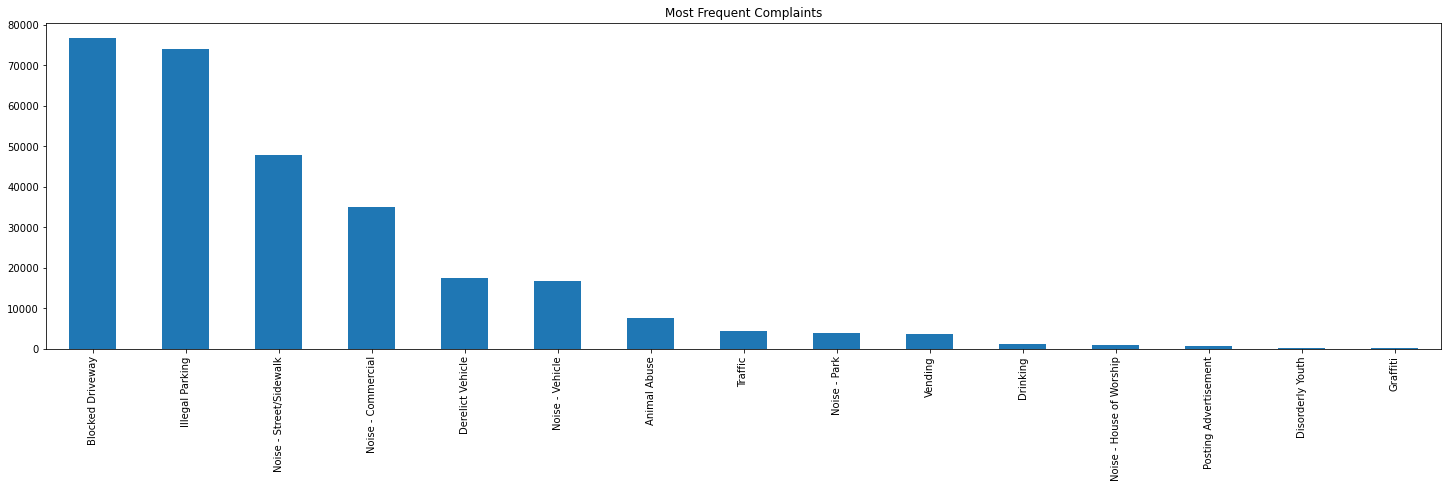

In [38]:
# to plot the complaint types against the number of times they have occured

(service311new['Complaint_Type'].value_counts()).head(25).plot(kind='bar', figsize=(25,6), title="Most Frequent Complaints")

# Conclusion 1 - 

### Borough wise, Brooklyn has the most number of Complaints followed by Queens and Manhattan.

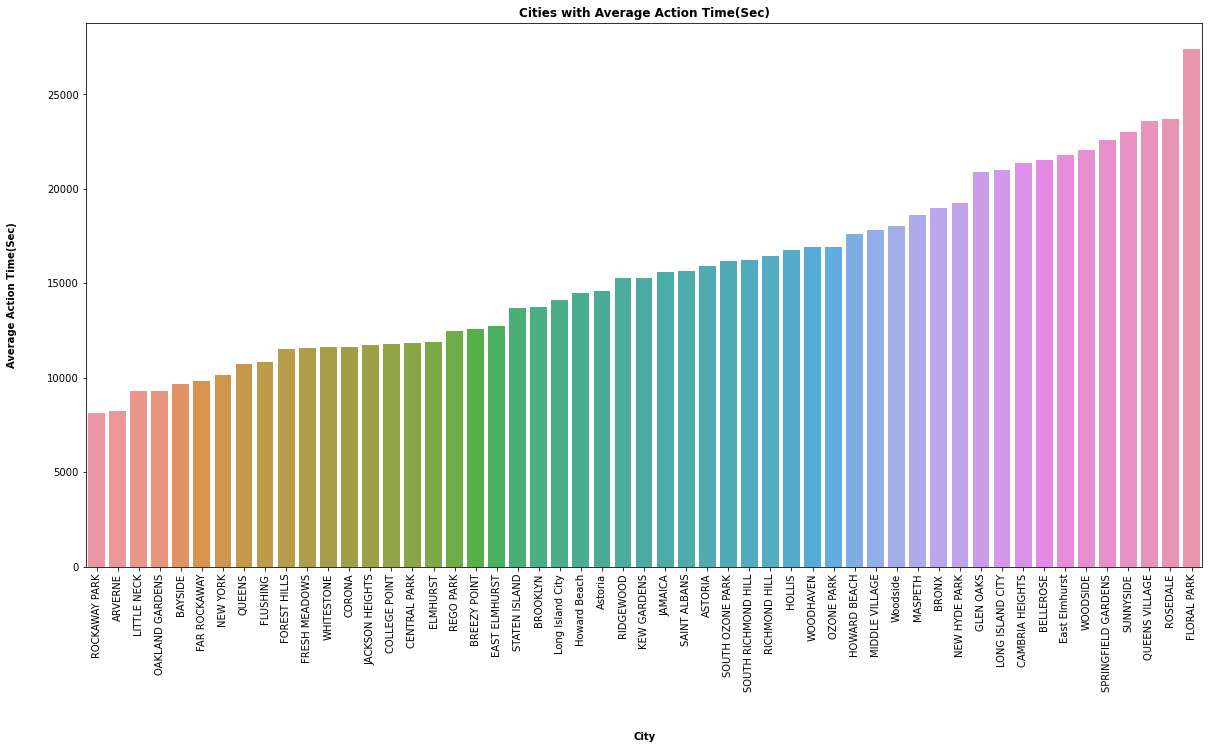

In [55]:
# City Vs Request_Closing_time required for resolving the complaint in particular city

city_avg_act_time = service311new[['City', 'Request_Closing_Time_Sec']]
city_avg_act_time1 = city_avg_act_time.groupby('City')['Request_Closing_Time_Sec'].mean().to_frame()

city_avg_act_time1 = city_avg_act_time1.sort_values('Request_Closing_Time_Sec')

city_avg_act_time1['City'] = city_avg_act_time1.index

text={'weight':'bold'}

plt.figure(figsize=(20,10))

sns.barplot(x='City', y='Request_Closing_Time_Sec', data=city_avg_act_time1)

plt.title("Cities with Average Action Time(Sec)", fontdict=text)

plt.xlabel("City", fontdict=text, labelpad = 40)

plt.ylabel("Average Action Time(Sec)", fontdict=text, labelpad = 30)

plt.xticks(rotation=90)

plt.show()

# Conclusion 2 - 

### The most frequent complaint type received is about Blocked Driveway, followed by illegal parking

In [56]:
service311new['Borough'].value_counts()

BROOKLYN         96899
QUEENS           79833
MANHATTAN        62081
BRONX            40231
STATEN ISLAND    12217
Name: Borough, dtype: int64

<AxesSubplot:ylabel='Borough'>

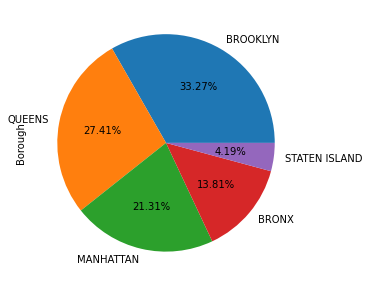

In [57]:
service311new['Borough'].value_counts().plot(kind='pie', autopct='%1.2f%%', startangle=0,figsize=(20,5))

# Conclusion 3 - 

### Rockway park and Arverne  have minimum response time & floral park has maximum response time.

<AxesSubplot:title={'center':'Location Type Vs Complain'}>

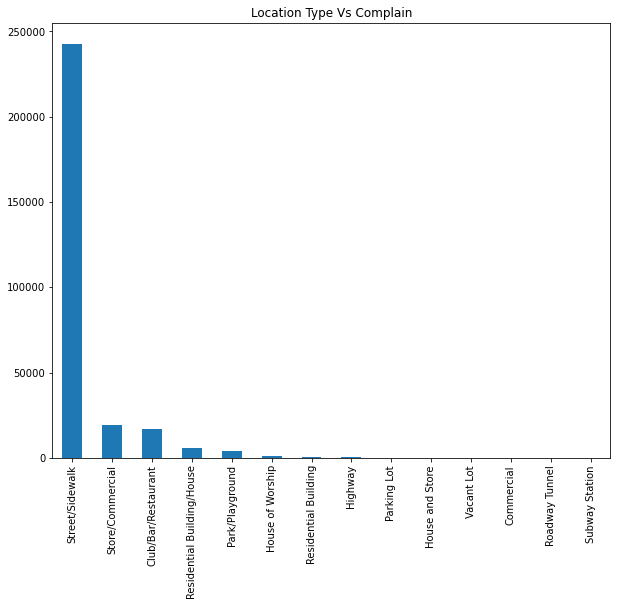

In [58]:
service311new['Location_Type'].value_counts().plot(kind='bar', figsize=(10,8), title='Location Type Vs Complain')

# Conclusion 4 - 

### Most of the complaints are reported in Location_Type 'Street/Sidewalk'

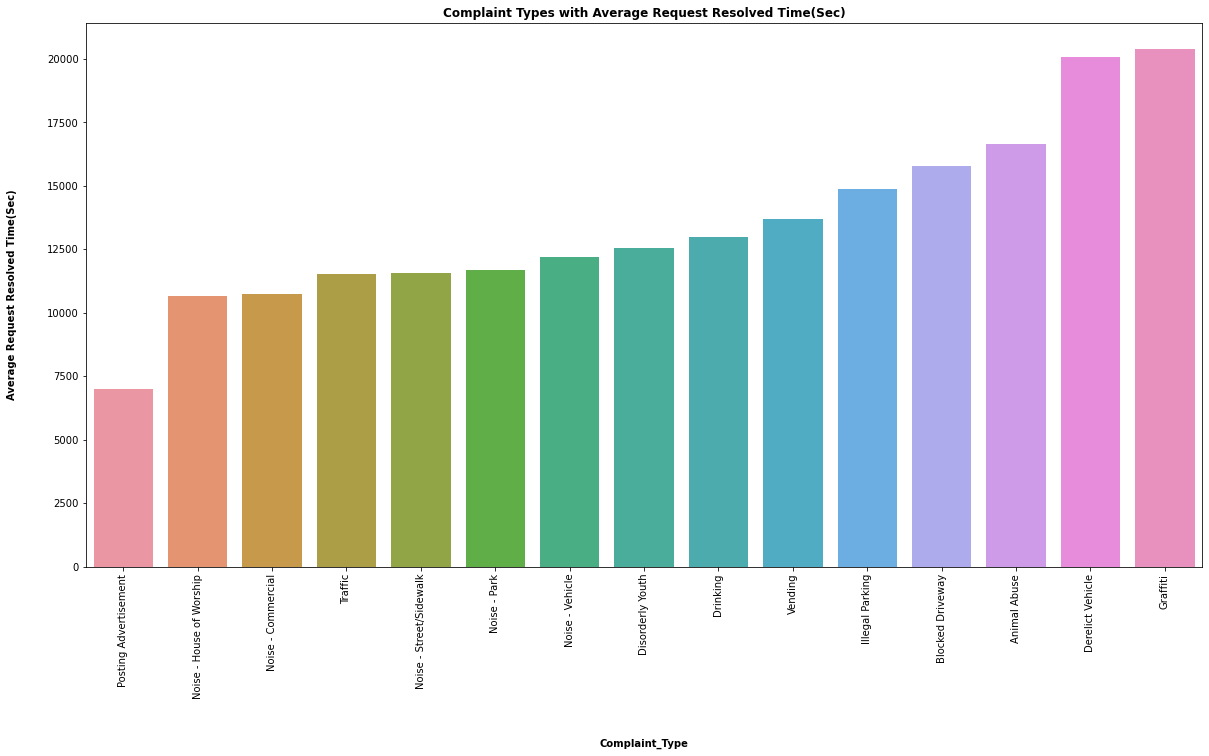

In [59]:
# Complaint_Type Vs Request_Closing_Time

cmpl_act_time = service311new[['Complaint_Type', 'Request_Closing_Time_Sec']]

cmpl_act_time1 = cmpl_act_time.groupby('Complaint_Type')['Request_Closing_Time_Sec'].mean().to_frame()

cmpl_act_time1 = cmpl_act_time1.sort_values('Request_Closing_Time_Sec')

cmpl_act_time1['Complaint_Type'] = cmpl_act_time1.index

text={'weight':'bold'}

plt.figure(figsize=(20,10))

sns.barplot(x='Complaint_Type', y='Request_Closing_Time_Sec', data=cmpl_act_time1)

plt.title("Complaint Types with Average Request Resolved Time(Sec)", fontdict=text)

plt.xlabel("Complaint_Type", fontdict=text, labelpad = 40)

plt.ylabel("Average Request Resolved Time(Sec)", fontdict=text, labelpad = 30)

plt.xticks(rotation=90)

plt.show()

## Ordering the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

In [64]:
# Complaint type based on request closing time grouping from different location type
grpby_complaint_type = service311new.sort_values('Request_Closing_Time_Sec').groupby(['Location_Type', 'Complaint_Type'])['Request_Closing_Time_Sec'].mean().to_frame()

dfby_location_type = pd.DataFrame(grpby_complaint_type)

dfby_location_type.style.set_table_styles([{'selector':'tr', 'props':[('font-size','10pt'),('border-style', 'solid'), ('border-width', '1px')]}])

In [65]:
# Complaint type based on request closing time grouping from different city

grpby_complaint_type1 = service311new.sort_values('Request_Closing_Time_Sec').groupby(['City', 'Complaint_Type'])['Request_Closing_Time_Sec'].mean().to_frame()

dfby_location_type1 = pd.DataFrame(grpby_complaint_type1).head(80)

dfby_location_type1.style.set_table_styles([{'selector':'tr', 'props':[('font-size','10pt'),('border-style', 'solid'), ('border-width', '1px')]}])

# Statistical Testing

### a)Whether the average response time across complaint types is similar or not (overall)


#### here alpha value is not given, so we assume alpha value = 0.05, i.e. testing in confidence level=95%

In [70]:
complaint_type = service311new['Complaint_Type'].value_counts().index

for i in range(len(complaint_type)):
    exec("sample{} = service311new.loc[(service311new['Complaint_Type']=='{}'), 'Request_Closing_Time_Sec']".format(i+1, complaint_type[i]))

fscore,pvalue = stats.f_oneway(sample1, sample2,sample3,sample4, sample5,sample6,sample7,sample8,sample9,sample10,sample11,sample12,sample13, sample14, sample15)

print("fscore : {:.2f}, pvalue : {:.2f}".format(fscore,pvalue))

fscore : 691.51, pvalue : 0.00


### pvalue is less than alpha value.

#### The average response time across different complaint type is not similar(overall).

### b) Are the type of complaint or service requested and location related?

In [73]:
# chi square test of independence

chi_sq_complaint_Loc_Type = pd.crosstab(service311new['Complaint_Type'], service311new['Location'])

chisq,pval,df,et = stats.chi2_contingency(chi_sq_complaint_Loc_Type)

print(" chisq score : {:.2f}, pvalue : {:.3f}".format(chisq,pval))

 chisq score : 3104085.04, pvalue : 0.000
